In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_unweighted, venn3_unweighted

## Configuration for datasets

- Spark executed on CloudSpeller groupOrtho1.txt file, with different tree syntax.
- settings

```
-p 1
--alphabet 2
--degen 2
--min_len 8
--max_len 9
```

- CloudSpeller executed on groupOrtho1.txt using settings:

```
sMotifAlgorithm_Type=EXACT
sIndex_Structure=GST
sNode_Decoration_Type=BITS
sConservationScore=BLS
sBLS_Thresholds=15,50,60,70,90,95
iKmin=8
iKmax=8
iMax_Degenerate_Positions=2
sMotif_Alphabet=TWOFOLDSANDN
sFilter_Type=SIMULTANEOUS
iFamily_Cutoff=1
iConfidence_Cutoff=50
iBackground_Group_Size=1000
```

## Import and compare datasets

In [4]:
n_thresholds = 6

In [5]:
df_cloud = pd.read_csv("cloud.tsv", delim_whitespace=True, header=None,
                      names=[
                          "group",
                          "motif",
                          *[f"fc {x}" for x in range(6)],
                          *[f"conf {x}" for x in range(6)],
                      ])

In [6]:
df_cloud.iloc[:, 8:] /= 100
df_cloud

,group,motif,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5,conf 0,conf 1,conf 2,conf 3,conf 4,conf 5
0,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1,0.000000,0.000000,0.000000,0.000000,0.25,1.0
1,AAAAAAAC,CAAAAAAA,7,5,5,3,2,1,0.142857,0.000000,0.000000,0.333333,0.25,1.0
2,AAAAAAAG,AAAAAAGA,2,2,2,1,1,1,0.000000,0.000000,0.000000,0.000000,0.50,1.0
3,AAAAAAAG,AAAAAAAG,9,9,9,2,1,0,0.444444,0.555556,0.611111,0.500000,0.50,0.0
4,AAAAAAAG,AAAAAGAA,3,3,3,2,1,0,0.000000,0.000000,0.000000,0.500000,0.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526898,CCCGGGKK,GKKGCGCC,4,4,3,1,1,0,0.750000,0.750000,0.666667,1.000000,1.00,0.0
1526899,CCCGGGKK,KCKCCGGG,1,1,1,1,1,0,0.000000,0.000000,0.000000,1.000000,1.00,0.0
1526900,CCCGGGKK,GGKKGCCC,2,1,1,0,0,0,0.500000,0.000000,0.000000,0.000000,0.00,0.0
1526901,CCCGGGKK,GKCKCGGC,2,0,0,0,0,0,0.500000,0.000000,0.000000,0.000000,0.00,0.0


In [7]:
df_spark = pd.read_csv("spark_dedoubled.tsv", delim_whitespace=True, header=None,
                      names=[
                          "motif",
                          *[f"fc {x}" for x in range(6)],
                          *[f"conf {x}" for x in range(6)],
                      ])
df_spark

,motif,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5,conf 0,conf 1,conf 2,conf 3,conf 4,conf 5
0,ARAACKAA,4,4,4,4,3,2,0.000000,0.000000,0.000000,0.500000,0.666667,1.0
1,AAACKARA,9,8,7,6,4,1,0.333333,0.375000,0.428571,0.666667,0.750000,1.0
2,RAAAAAKC,8,8,8,6,3,1,0.250000,0.375000,0.500000,0.666667,0.666667,1.0
3,AARACKAA,6,6,4,4,4,3,0.000000,0.166667,0.000000,0.500000,0.750000,1.0
4,AAKRAACA,7,5,5,1,1,1,0.142857,0.000000,0.200000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547308,MGMATGAG,2,2,2,1,0,0,0.500000,0.500000,0.500000,1.000000,0.000000,0.0
1547309,TMAGGMGA,2,1,1,0,0,0,0.500000,0.000000,0.000000,0.000000,0.000000,0.0
1547310,GMAGAMTG,2,2,2,2,0,0,0.500000,0.500000,0.500000,1.000000,0.000000,0.0
1547311,MAGAMTGG,2,2,2,0,0,0,0.500000,0.500000,0.500000,0.000000,0.000000,0.0


In [8]:
len(df_cloud) / len(df_spark)

0.9868093915064373

In [9]:
df_cloud.dtypes

group      object
motif      object
fc 0        int64
fc 1        int64
fc 2        int64
fc 3        int64
fc 4        int64
fc 5        int64
conf 0    float64
conf 1    float64
conf 2    float64
conf 3    float64
conf 4    float64
conf 5    float64
dtype: object

In [10]:
cloud_motifs = df_cloud["motif"].sort_values()
cloud_motifs

0         AAAAAAAC
3         AAAAAAAG
7         AAAAAAAT
11        AAAAAAAY
22        AAAAAACC
            ...   
490711    YYTTAGAA
384600    YYTTCAAA
843175    YYTTCACA
842476    YYTTCCAA
491131    YYTTGAAA
Name: motif, Length: 1526903, dtype: object

In [11]:
spark_motifs = df_spark["motif"].sort_values()
spark_motifs

1190307    AAAAAAAC
1456985    AAAAAAAG
636390     AAAAAAAT
66640      AAAAAAAY
1190305    AAAAAACA
             ...   
332465     YYTTAGAA
19053      YYTTCAAA
788822     YYTTCACA
790084     YYTTCCAA
332577     YYTTGAAA
Name: motif, Length: 1547313, dtype: object

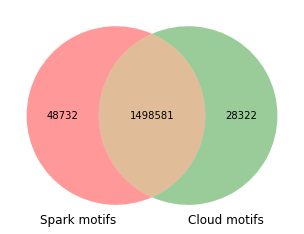

In [12]:
venn2_unweighted([set(spark_motifs), set(cloud_motifs)], set_labels=["Spark motifs", "Cloud motifs"])

In [13]:
cloud_motifs[cloud_motifs == 'AAAAANTK']

14535    AAAAANTK
Name: motif, dtype: object

## Compare common spark and cloud motifs

In [14]:
def compare_fc(left, right, return_index=0):
    left = left.copy()
    right = right.copy()
    left.columns = right.columns
    comp = left.compare(right)
    return comp

def count_difference(comp, return_index=0):
    return comp.diff(axis=1).iloc[:,list(range(1,comp.shape[1],2))]

def get_differences_mask(left, right):
    left = left.copy()
    right = right.copy()
    left.columns = right.columns
    return ~np.isclose(left, right).all(axis=1)

In [15]:
common = set(spark_motifs) & set(cloud_motifs)

In [18]:
common_non_degen = []

for m in common:
    degen = False
    for c in m:
        if c not in "ACGT":
            degen = True
            break
    if not degen:
        common_non_degen.append(m)
len(common_non_degen)

5456

In [19]:
pd.set_option('display.max_columns', None)

def compare_common_motifs(df_l, df_r, suffix_l, suffix_r):
    common = set(df_l.motif) & set(df_r.motif)
    df = pd.merge(df_l,
        df_r,
        on="motif", suffixes=(suffix_l, suffix_r))
    return df[df.motif.isin(common)]

common_s_c = compare_common_motifs(df_spark, df_cloud, "_s", "_c")
common_s_c

,motif,fc 0_s,fc 1_s,fc 2_s,fc 3_s,fc 4_s,fc 5_s,conf 0_s,conf 1_s,conf 2_s,conf 3_s,conf 4_s,conf 5_s,group,fc 0_c,fc 1_c,fc 2_c,fc 3_c,fc 4_c,fc 5_c,conf 0_c,conf 1_c,conf 2_c,conf 3_c,conf 4_c,conf 5_c
0,ARAACKAA,4,4,4,4,3,2,0.000000,0.000000,0.000000,0.500000,0.666667,1.0,AAAAACKR,4,4,4,4,3,2,0.000000,0.000000,0.000000,0.500000,0.666667,1.0
1,AAACKARA,9,8,7,6,4,1,0.333333,0.375000,0.428571,0.666667,0.750000,1.0,AAAAACKR,9,8,7,6,4,1,0.333333,0.375000,0.428571,0.666667,0.750000,1.0
2,RAAAAAKC,8,8,8,6,3,1,0.250000,0.375000,0.500000,0.666667,0.666667,1.0,AAAAACKR,8,8,8,6,3,1,0.250000,0.375000,0.500000,0.666667,0.666667,1.0
3,AARACKAA,6,6,4,4,4,3,0.000000,0.166667,0.000000,0.500000,0.750000,1.0,AAAAACKR,6,6,4,4,4,3,0.000000,0.166667,0.000000,0.500000,0.750000,1.0
4,AAKRAACA,7,5,5,1,1,1,0.142857,0.000000,0.200000,0.000000,0.000000,1.0,AAAAACKR,7,5,5,1,1,1,0.142857,0.000000,0.200000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498576,MGMATGAG,2,2,2,1,0,0,0.500000,0.500000,0.500000,1.000000,0.000000,0.0,AAGGGMMT,2,2,2,1,0,0,0.500000,0.500000,0.500000,1.000000,0.000000,0.0
1498577,TMAGGMGA,2,1,1,0,0,0,0.500000,0.000000,0.000000,0.000000,0.000000,0.0,AAGGGMMT,2,1,1,0,0,0,0.500000,0.000000,0.000000,0.000000,0.000000,0.0
1498578,GMAGAMTG,2,2,2,2,0,0,0.500000,0.500000,0.500000,1.000000,0.000000,0.0,AAGGGMMT,2,2,2,2,0,0,0.500000,0.500000,0.500000,1.000000,0.000000,0.0
1498579,MAGAMTGG,2,2,2,0,0,0,0.500000,0.500000,0.500000,0.000000,0.000000,0.0,AAGGGMMT,2,2,2,0,0,0,0.500000,0.500000,0.500000,0.000000,0.000000,0.0


In [20]:
mask = get_differences_mask(common_s_c.iloc[:, 7:13], common_s_c.iloc[:, 20:])
print(mask.mean())
common_s_c[mask]

0.2615274049250591


,motif,fc 0_s,fc 1_s,fc 2_s,fc 3_s,fc 4_s,fc 5_s,conf 0_s,conf 1_s,conf 2_s,conf 3_s,conf 4_s,conf 5_s,group,fc 0_c,fc 1_c,fc 2_c,fc 3_c,fc 4_c,fc 5_c,conf 0_c,conf 1_c,conf 2_c,conf 3_c,conf 4_c,conf 5_c
6,AACAAARK,8,8,8,4,3,0,0.250000,0.375000,0.500000,0.500000,0.666667,0.0,AAAAACKR,8,8,8,4,4,0,0.250000,0.375000,0.500000,0.500000,0.750000,0.0
11,KCRAAAAA,7,7,5,5,3,0,0.142857,0.285714,0.200000,0.600000,0.666667,0.0,AAAAACKR,7,7,6,5,3,0,0.142857,0.285714,0.333333,0.600000,0.666667,0.0
16,AKACARAA,6,6,5,3,2,0,0.000000,0.166667,0.200000,0.333333,0.500000,0.0,AAAAACKR,6,6,6,3,2,0,0.000000,0.166667,0.333333,0.333333,0.500000,0.0
32,RACAAAAK,8,7,6,4,3,0,0.250000,0.285714,0.333333,0.500000,0.666667,0.0,AAAAACKR,8,7,6,4,4,0,0.250000,0.285714,0.333333,0.500000,0.750000,0.0
41,ACAKAAAR,6,6,5,2,1,1,0.000000,0.166667,0.200000,0.000000,0.000000,1.0,AAAAACKR,6,6,6,2,1,1,0.000000,0.166667,0.333333,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498551,TGGAMGAM,6,5,3,0,0,0,0.833333,0.800000,0.666667,0.000000,0.000000,0.0,AAGGGMMT,6,5,4,0,0,0,0.833333,0.800000,0.750000,0.000000,0.000000,0.0
1498552,GGMMATGA,5,5,4,1,1,0,0.800000,0.800000,0.750000,1.000000,1.000000,0.0,AAGGGMMT,5,5,5,1,1,0,0.800000,0.800000,0.800000,1.000000,1.000000,0.0
1498560,GAGMATGM,2,2,1,0,0,0,0.500000,0.500000,0.000000,0.000000,0.000000,0.0,AAGGGMMT,2,2,2,0,0,0,0.500000,0.500000,0.500000,0.000000,0.000000,0.0
1498561,MMAGGGAT,2,2,1,0,0,0,0.500000,0.500000,0.000000,0.000000,0.000000,0.0,AAGGGMMT,2,2,2,0,0,0,0.500000,0.500000,0.500000,0.000000,0.000000,0.0


In [41]:
common_s_c[mask][common_s_c[mask].motif.isin(common_non_degen)]

,motif,fc 0_s,fc 1_s,fc 2_s,fc 3_s,fc 4_s,fc 5_s,conf 0_s,conf 1_s,conf 2_s,conf 3_s,conf 4_s,conf 5_s,group,fc 0_c,fc 1_c,fc 2_c,fc 3_c,fc 4_c,fc 5_c,conf 0_c,conf 1_c,conf 2_c,conf 3_c,conf 4_c,conf 5_c
45313,GAGGAGAT,1,1,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,AAAGGGGT,1,1,1,0,0,0,1.0,1.0,1.0,0.0,0.0,0.0
80788,TAAGATGG,1,1,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,AAAGGGTT,1,1,1,0,0,0,1.0,1.0,1.0,0.0,0.0,0.0
80798,ATAAGGTG,1,1,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,AAAGGGTT,1,1,1,0,0,0,1.0,1.0,1.0,0.0,0.0,0.0
80806,AGGTTGAA,1,1,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,AAAGGGTT,1,1,1,0,0,0,1.0,1.0,1.0,0.0,0.0,0.0
80812,GATTAGAG,1,1,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,AAAGGGTT,1,1,1,0,0,0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476598,AGATACAA,1,1,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,AAAAACGT,1,1,1,0,0,0,1.0,1.0,1.0,0.0,0.0,0.0
1476628,CGAAAAAT,1,1,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,AAAAACGT,1,1,1,0,0,0,1.0,1.0,1.0,0.0,0.0,0.0
1476648,TAACAAAG,1,1,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,AAAAACGT,1,1,1,0,0,0,1.0,1.0,1.0,0.0,0.0,0.0
1481677,TATCAAAA,2,1,0,0,0,0,0.5,1.0,0.0,0.0,0.0,0.0,AAAAACTT,2,1,1,0,0,0,0.5,1.0,1.0,0.0,0.0,0.0


In [17]:
comp = compare_fc(common_s_c.iloc[:, 7:13], common_s_c.iloc[:, 20:])

In [18]:
count_difference(comp).describe()

,conf 0_c,conf 1_c,conf 2_c,conf 3_c,conf 4_c,conf 5_c
,other,other,other,other,other,other
count,3.399450e+05,3.411320e+05,3.713650e+05,7.836500e+04,5.031700e+04,5.036000e+03
mean,6.351200e-03,-1.444150e-02,-2.699192e-02,1.297163e-03,1.059428e-01,-2.248291e-02
std,1.271178e-01,3.860967e-01,3.720487e-01,3.699488e-01,6.518242e-01,3.334465e-01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,-3.333333e-08,-3.333333e-08,-1.428572e-01,-3.333333e-08,-3.333333e-01,-3.333333e-08
50%,-3.333333e-08,-3.333333e-08,-6.666667e-09,-3.333333e-08,-3.333333e-08,-3.333333e-08
75%,-6.666667e-09,-6.666667e-09,1.000000e-01,-6.666667e-09,1.000000e+00,-3.333333e-08
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## Compare with motifIterator output

Input file has 10 gene families, with 9 of 4 species and one of 5 species, resulting in 41 DNA regions.  


'GGTCAGCA' has only one occurence, reverse complement has 4 occurences in all species of a gene family:

- ((BD:0.2688,OS:0.2688):0.0538,(SB:0.086,ZM:0.086):0.2366);
- 4 regions
- occurence in OS
- cloud: 1 1 1 1 1 1 	100.0 100.0 100.0 100.0 100.0 100.0
- spark: 1 0 0 0 0 0 	1.0 0.0 0.0 0.0 0.0 0.0

![afbeelding.png](msa_GGTCAGCA.png)

Do manual motifIterator on input fle:

```
motifIterator treefix_groupOrtho1.txt AF 2 '0.15,0.5,0.6,0.7,0.9,0.95' 2 8 9 > group1_iterator_output
```

```
> ./motifdeserialiser < group1_iterator_output | grep 'GGTCAGCA'

AACCGGGT        GGTCAGCA        6
```

Reverse complement: TGCTGACC
- Present in all 

```
./motifdeserialiser < group1_iterator_output | wc -l

10424709
```

- Length df_spark: 41686
- Length df_cloud: 1526903

```
./motifdeserialiser < group1_iterator_output | cut -f2 | sort | uniq | wc -l
3871913
```

- counted motifIterator has same output size

```
./motifdeserialiser --counted < counted_group1_iterator_output | wc -l
3871913
```

In [19]:
df_iterator = pd.read_csv("serialized_counted_group1_iterator_output.gz", delim_whitespace=True, header=None,
                      names=[
                          "group",
                          "motif",
                          *[f"fc {x}" for x in range(6)],
                      ]) 
df_iterator

,group,motif,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5
0,AAAAAAAA,AAAAAAAA,9,8,5,3,3,3
1,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1
2,AAAAAAAM,AAAAAAAM,9,8,5,3,3,3
3,AAAAAAAG,AAAAAAAG,9,9,9,2,1,0
4,AAAAAAAR,AAAAAAAR,10,10,9,8,7,3
...,...,...,...,...,...,...,...,...
3871908,AACGNNTT,NNTTGACA,9,8,7,5,5,2
3871909,AAGGNNTT,NNTTGAGA,9,8,6,6,3,1
3871910,AACGNNTT,NNTTGCAA,6,5,3,1,1,1
3871911,AAGGNNTT,NNTTGGAA,5,5,5,3,1,0


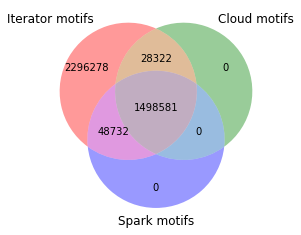

In [20]:
venn3_unweighted([set(df_iterator.motif), set(cloud_motifs), set(spark_motifs)], set_labels=["Iterator motifs", "Cloud motifs", "Spark motifs"])

In [21]:
df_iterator[df_iterator.motif == "GGTCAGCA"]

,group,motif,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5
2105742,AACCGGGT,GGTCAGCA,1,1,1,1,1,1


## Compare common cloud and interator motifs

In [22]:
# check if all motifIterator counts also are in cloud speller
df_c_i = df_cloud.merge(df_iterator, on="motif", suffixes=("_c", "_i"))
df_c_i

,group_c,motif,fc 0_c,fc 1_c,fc 2_c,fc 3_c,fc 4_c,fc 5_c,conf 0,conf 1,conf 2,conf 3,conf 4,conf 5,group_i,fc 0_i,fc 1_i,fc 2_i,fc 3_i,fc 4_i,fc 5_i
0,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1,0.000000,0.000000,0.000000,0.000000,0.25,1.0,AAAAAAAC,4,3,2,2,2,1
1,AAAAAAAC,CAAAAAAA,7,5,5,3,2,1,0.142857,0.000000,0.000000,0.333333,0.25,1.0,AAAAAAAC,7,5,5,3,2,1
2,AAAAAAAG,AAAAAAGA,2,2,2,1,1,1,0.000000,0.000000,0.000000,0.000000,0.50,1.0,AAAAAAAG,2,2,2,1,1,1
3,AAAAAAAG,AAAAAAAG,9,9,9,2,1,0,0.444444,0.555556,0.611111,0.500000,0.50,0.0,AAAAAAAG,9,9,9,2,1,0
4,AAAAAAAG,AAAAAGAA,3,3,3,2,1,0,0.000000,0.000000,0.000000,0.500000,0.50,0.0,AAAAAAAG,3,3,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526898,CCCGGGKK,GKKGCGCC,4,4,3,1,1,0,0.750000,0.750000,0.666667,1.000000,1.00,0.0,CCCGGGKK,4,4,3,1,0,0
1526899,CCCGGGKK,KCKCCGGG,1,1,1,1,1,0,0.000000,0.000000,0.000000,1.000000,1.00,0.0,CCCGGGKK,1,1,1,1,0,0
1526900,CCCGGGKK,GGKKGCCC,2,1,1,0,0,0,0.500000,0.000000,0.000000,0.000000,0.00,0.0,CCCGGGKK,2,1,1,0,0,0
1526901,CCCGGGKK,GKCKCGGC,2,0,0,0,0,0,0.500000,0.000000,0.000000,0.000000,0.00,0.0,CCCGGGKK,2,0,0,0,0,0


In [23]:
comp = compare_fc(df_c_i.iloc[:, 2:8], df_c_i.iloc[:, 15:21])
comp

fc 2_i       fc 4_i      
          self other   self other
34         3.0   2.0    NaN   NaN
37         NaN   NaN    1.0   0.0
41         2.0   1.0    NaN   NaN
46         3.0   2.0    NaN   NaN
58         2.0   1.0    NaN   NaN
...        ...   ...    ...   ...
1526891    4.0   3.0    NaN   NaN
1526897    1.0   0.0    NaN   NaN
1526898    NaN   NaN    1.0   0.0
1526899    NaN   NaN    1.0   0.0
1526902    NaN   NaN    1.0   0.0

[194565 rows x 4 columns]

In [24]:
count_difference(comp).describe()

,fc 2_i,fc 4_i
,other,other
count,164740.0,29825.0
mean,-1.0,-1.0
std,0.0,0.0
min,-1.0,-1.0
25%,-1.0,-1.0
50%,-1.0,-1.0
75%,-1.0,-1.0
max,-1.0,-1.0


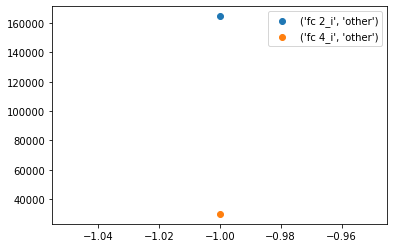

In [25]:
fig, ax = plt.subplots()

for c_name, c in comp.diff(axis=1).iloc[:,list(range(1,comp.shape[1],2))].items():
    df = c.value_counts(dropna=True)
    ax.scatter(df.index.values, df.values, label=c_name)
ax.legend()

All family count errors between cloud and iterator are off-by-one errors (+1 in cloud counts) for threshold 2 and 4

In [26]:
mask.mean()

0.2615274049250591

In [27]:
df_c_i

,group_c,motif,fc 0_c,fc 1_c,fc 2_c,fc 3_c,fc 4_c,fc 5_c,conf 0,conf 1,conf 2,conf 3,conf 4,conf 5,group_i,fc 0_i,fc 1_i,fc 2_i,fc 3_i,fc 4_i,fc 5_i
0,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1,0.000000,0.000000,0.000000,0.000000,0.25,1.0,AAAAAAAC,4,3,2,2,2,1
1,AAAAAAAC,CAAAAAAA,7,5,5,3,2,1,0.142857,0.000000,0.000000,0.333333,0.25,1.0,AAAAAAAC,7,5,5,3,2,1
2,AAAAAAAG,AAAAAAGA,2,2,2,1,1,1,0.000000,0.000000,0.000000,0.000000,0.50,1.0,AAAAAAAG,2,2,2,1,1,1
3,AAAAAAAG,AAAAAAAG,9,9,9,2,1,0,0.444444,0.555556,0.611111,0.500000,0.50,0.0,AAAAAAAG,9,9,9,2,1,0
4,AAAAAAAG,AAAAAGAA,3,3,3,2,1,0,0.000000,0.000000,0.000000,0.500000,0.50,0.0,AAAAAAAG,3,3,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526898,CCCGGGKK,GKKGCGCC,4,4,3,1,1,0,0.750000,0.750000,0.666667,1.000000,1.00,0.0,CCCGGGKK,4,4,3,1,0,0
1526899,CCCGGGKK,KCKCCGGG,1,1,1,1,1,0,0.000000,0.000000,0.000000,1.000000,1.00,0.0,CCCGGGKK,1,1,1,1,0,0
1526900,CCCGGGKK,GGKKGCCC,2,1,1,0,0,0,0.500000,0.000000,0.000000,0.000000,0.00,0.0,CCCGGGKK,2,1,1,0,0,0
1526901,CCCGGGKK,GKCKCGGC,2,0,0,0,0,0,0.500000,0.000000,0.000000,0.000000,0.00,0.0,CCCGGGKK,2,0,0,0,0,0


In [28]:
mask = get_differences_mask(df_c_i.iloc[:, 2:8], df_c_i.iloc[:, 15:21])
df_c_i[mask]

,group_c,motif,fc 0_c,fc 1_c,fc 2_c,fc 3_c,fc 4_c,fc 5_c,conf 0,conf 1,conf 2,conf 3,conf 4,conf 5,group_i,fc 0_i,fc 1_i,fc 2_i,fc 3_i,fc 4_i,fc 5_i
34,AAAAAACG,AGAAACAA,3,3,3,1,1,0,0.666667,0.666667,0.666667,1.0,1.0,0.0,AAAAAACG,3,3,2,1,1,0
37,AAAAAACG,AACAAAAG,1,1,1,1,1,0,0.000000,0.000000,0.000000,1.0,1.0,0.0,AAAAAACG,1,1,1,1,0,0
41,AAAAAACG,GAAAAAAC,2,2,2,0,0,0,0.500000,0.500000,0.500000,0.0,0.0,0.0,AAAAAACG,2,2,1,0,0,0
46,AAAAAACT,ACATAAAA,3,3,3,0,0,0,0.333333,0.666667,0.666667,0.0,0.0,0.0,AAAAAACT,3,3,2,0,0,0
58,AAAAAACT,CATAAAAA,2,2,2,0,0,0,0.000000,0.500000,0.500000,0.0,0.0,0.0,AAAAAACT,2,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526891,CCCGGGKK,CCGKKGGC,4,4,4,0,0,0,0.750000,0.750000,0.750000,0.0,0.0,0.0,CCCGGGKK,4,4,3,0,0,0
1526897,CCCGGGKK,GCKCGCKG,2,1,1,0,0,0,0.500000,0.000000,0.000000,0.0,0.0,0.0,CCCGGGKK,2,1,0,0,0,0
1526898,CCCGGGKK,GKKGCGCC,4,4,3,1,1,0,0.750000,0.750000,0.666667,1.0,1.0,0.0,CCCGGGKK,4,4,3,1,0,0
1526899,CCCGGGKK,KCKCCGGG,1,1,1,1,1,0,0.000000,0.000000,0.000000,1.0,1.0,0.0,CCCGGGKK,1,1,1,1,0,0


## Compare Spark and raw iterator output

In [29]:
# check if all motifIterator counts also are in cloud speller
df_s_i = df_spark.merge(df_iterator, on="motif", suffixes=("_s", "_i"))
df_s_i

,motif,fc 0_s,fc 1_s,fc 2_s,fc 3_s,fc 4_s,fc 5_s,conf 0,conf 1,conf 2,conf 3,conf 4,conf 5,group,fc 0_i,fc 1_i,fc 2_i,fc 3_i,fc 4_i,fc 5_i
0,ARAACKAA,4,4,4,4,3,2,0.000000,0.000000,0.000000,0.500000,0.666667,1.0,AAAAACKR,4,4,4,4,3,2
1,AAACKARA,9,8,7,6,4,1,0.333333,0.375000,0.428571,0.666667,0.750000,1.0,AAAAACKR,9,8,7,6,4,1
2,RAAAAAKC,8,8,8,6,3,1,0.250000,0.375000,0.500000,0.666667,0.666667,1.0,AAAAACKR,8,8,8,6,3,1
3,AARACKAA,6,6,4,4,4,3,0.000000,0.166667,0.000000,0.500000,0.750000,1.0,AAAAACKR,6,6,4,4,4,3
4,AAKRAACA,7,5,5,1,1,1,0.142857,0.000000,0.200000,0.000000,0.000000,1.0,AAAAACKR,7,5,5,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547308,MGMATGAG,2,2,2,1,0,0,0.500000,0.500000,0.500000,1.000000,0.000000,0.0,AAGGGMMT,2,2,2,1,0,0
1547309,TMAGGMGA,2,1,1,0,0,0,0.500000,0.000000,0.000000,0.000000,0.000000,0.0,AAGGGMMT,2,1,1,0,0,0
1547310,GMAGAMTG,2,2,2,2,0,0,0.500000,0.500000,0.500000,1.000000,0.000000,0.0,AAGGGMMT,2,2,2,2,0,0
1547311,MAGAMTGG,2,2,2,0,0,0,0.500000,0.500000,0.500000,0.000000,0.000000,0.0,AAGGGMMT,2,2,2,0,0,0


In [30]:
mask = get_differences_mask(df_s_i.iloc[:, 1:7], df_s_i.iloc[:, 14:20])
df_s_i[mask]

,motif,fc 0_s,fc 1_s,fc 2_s,fc 3_s,fc 4_s,fc 5_s,conf 0,conf 1,conf 2,conf 3,conf 4,conf 5,group,fc 0_i,fc 1_i,fc 2_i,fc 3_i,fc 4_i,fc 5_i


In [31]:
comp = compare_fc(df_s_i.iloc[:, 1:7], df_s_i.iloc[:, 14:20])

No difference between motifIterator and Spark family counts, as expected

## Check algo of Spark implementation

In [32]:
## mapsideCombine of motifIterator 
df_iterator.motif.unique().size

3871913

In [33]:
df_small = df_iterator[:12].copy()
df_small

,group,motif,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5
0,AAAAAAAA,AAAAAAAA,9,8,5,3,3,3
1,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1
2,AAAAAAAM,AAAAAAAM,9,8,5,3,3,3
3,AAAAAAAG,AAAAAAAG,9,9,9,2,1,0
4,AAAAAAAR,AAAAAAAR,10,10,9,8,7,3
5,AAAAAAAS,AAAAAAAS,9,9,9,5,4,1
6,AAAAAAAT,AAAAAAAT,8,6,6,5,4,2
7,AAAAAAAW,AAAAAAAW,10,9,7,6,6,5
8,AAAAAAAY,AAAAAAAY,10,9,7,6,6,5
9,AAAAAAAK,AAAAAAAK,10,10,10,9,7,3


In [34]:
from itertools import permutations
from math import factorial

def get_number_of_permutations(s, method="fac"):
    if method == "fac":
        output = 1
        for c in set(s):
            output *= factorial(s.count(c))
        return int(factorial(len(s)) / output)
    else:
        return len(set(permutations(s)))

def find_k_median(arr, k):
    print(f"k {k}")
    pivot = len(arr) // 2
    print(f"Pivot {pivot}")
    left, right = np.array_split(np.partition(arr, pivot), [pivot])
    print(f"Left {pivot}")
    print(f"Right {pivot}")
    if len(left) == k:
        return arr[pivot]
    elif len(left) == 0:
        left, right = np.array_split(np.partition(arr, pivot), [pivot])
        find_k_median(right, k - len(left))
    elif len(right) < k:
        find_k_median(right, k - len(left))
    else:
        find_k_median(left, k)

def find_median(arr):
    return find_k_median(arr, (len(arr) - 1) / 2)
    
def get_median_per_threshold(df, n_thresholds=6, method="median") -> np.ndarray:
    if method == "perm":
        # find the maximum number of permutations the key can represent
        perms = get_number_of_permutations(df.iloc[0, 0])
        if perms == 1:
            # return first value if this is only one
            return df.iloc[0, 2:].values
        else:
            # else brute force calculate the remaining mean
            nr = (perms + 1) / 2
            arr = np.zeros(n_thresholds)
            # return zero if amount of rows is more than double the permutations
            if df.shape[0] > nr:
                k = df.shape[0] - nr - 1
                for i in range(n_thresholds):
                    # find the mean for each threshold using divide-and-conquer
                    arr[i] = find_k_median(df[2+i], k)
            return arr
    else:
        return df.iloc[:,2:].median()

In [37]:
arr = np.array([1, 2, 2, 3])

print(arr.mean())

2.0


In [38]:
np.split(np.array([1, 2, 2, 3]), [0])


[array([], dtype=int64), array([1, 2, 2, 3])]

In [39]:
len([])

0

In [40]:
# calculating number of partition methods are equivalent
import random

for s in ["".join([random.choice("ACTGN") for _ in range(8)]) for _ in range(100)]:
    fac = get_number_of_permutations(s)
    perm = get_number_of_permutations(s, method=None)
    if fac != perm:
        print(fac)
        print(perm)
        print()

In [41]:
df_small.groupby("group").apply(get_median_per_threshold)

,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5
group,,,,,,
AAAAAAAA,9.0,8.0,5.0,3.0,3.0,3.0
AAAAAAAC,5.5,5.0,4.0,2.5,2.0,0.5
AAAAAAAG,9.0,9.0,9.0,2.0,1.0,0.0
AAAAAAAK,10.0,10.0,10.0,9.0,7.0,3.0
AAAAAAAM,9.0,8.0,5.0,3.0,3.0,3.0
AAAAAAAN,10.0,10.0,10.0,9.0,8.0,5.0
AAAAAAAR,10.0,10.0,9.0,8.0,7.0,3.0
AAAAAAAS,9.0,9.0,9.0,5.0,4.0,1.0
AAAAAAAT,8.0,6.0,6.0,5.0,4.0,2.0


In [42]:
# add medians for each group to motifs
df_medians = df_small.join(df_small.groupby("group").apply(get_median_per_threshold), on="group", rsuffix="_median")
df_medians

,group,motif,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5,fc 0_median,fc 1_median,fc 2_median,fc 3_median,fc 4_median,fc 5_median
0,AAAAAAAA,AAAAAAAA,9,8,5,3,3,3,9.0,8.0,5.0,3.0,3.0,3.0
1,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1,5.5,5.0,4.0,2.5,2.0,0.5
2,AAAAAAAM,AAAAAAAM,9,8,5,3,3,3,9.0,8.0,5.0,3.0,3.0,3.0
3,AAAAAAAG,AAAAAAAG,9,9,9,2,1,0,9.0,9.0,9.0,2.0,1.0,0.0
4,AAAAAAAR,AAAAAAAR,10,10,9,8,7,3,10.0,10.0,9.0,8.0,7.0,3.0
5,AAAAAAAS,AAAAAAAS,9,9,9,5,4,1,9.0,9.0,9.0,5.0,4.0,1.0
6,AAAAAAAT,AAAAAAAT,8,6,6,5,4,2,8.0,6.0,6.0,5.0,4.0,2.0
7,AAAAAAAW,AAAAAAAW,10,9,7,6,6,5,10.0,9.0,7.0,6.0,6.0,5.0
8,AAAAAAAY,AAAAAAAY,10,9,7,6,6,5,10.0,9.0,7.0,6.0,6.0,5.0
9,AAAAAAAK,AAAAAAAK,10,10,10,9,7,3,10.0,10.0,10.0,9.0,7.0,3.0


In [43]:
# F family_count
# f_bg = median
# conf = 
# filter, pass if family_count >= family_count_cutoff and conf >= confidence_score_cutoff

def process(df, family_count_cutoff=1, confidence_score_cutoff=.5):
    df_medians = df.join(df.groupby("group").median(), on="group", rsuffix="_median")
    f = df_medians.iloc[:,2:8]
    f_bg = df_medians.iloc[:,8:]
    f_bg.columns = f.columns
    mask = f <= f_bg
    conf = (f - f_bg) / f
    conf[mask] = .0
    filter_mask = (f >= family_count_cutoff) & (conf >= confidence_score_cutoff)
    conf.columns = [f"conf {x.split()[1]}" for x in conf.columns]
    output = pd.concat([df, conf], axis=1)
    output = output[filter_mask.any(axis=1)]
    return output

In [44]:
f = df_medians.iloc[:,2:8]
f_bg = df_medians.iloc[:,8:]
f_bg.columns = f.columns
# conf = np.zeros(f.shape)

mask = f <= f_bg
conf = (f - f_bg) / f
conf[mask] = .0
conf

,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.0,0.5
2,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0
5,0.000000,0.000000,0.000000,0.000000,0.0,0.0
6,0.000000,0.000000,0.000000,0.000000,0.0,0.0
7,0.000000,0.000000,0.000000,0.000000,0.0,0.0
8,0.000000,0.000000,0.000000,0.000000,0.0,0.0
9,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [45]:
filter_mask = (f >= 1) & (conf >= .5)
pd.concat([df_small, conf], axis=1)[filter_mask.any(axis=1)]

,group,motif,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5
1,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1,0.0,0.0,0.0,0.0,0.0,0.5


In [46]:
process(df_small)

,group,motif,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5,conf 0,conf 1,conf 2,conf 3,conf 4,conf 5
1,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1,0.0,0.0,0.0,0.0,0.0,0.5


In [47]:
df_new = process(df_iterator)
df_new

,group,motif,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5,conf 0,conf 1,conf 2,conf 3,conf 4,conf 5
1,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000
3,AAAAAAAG,AAAAAAAG,9,9,9,2,1,0,0.444444,0.555556,0.611111,0.500000,0.500000,0.000000
6,AAAAAAAT,AAAAAAAT,8,6,6,5,4,2,0.062500,0.000000,0.083333,0.400000,0.500000,0.500000
8,AAAAAAAY,AAAAAAAY,10,9,7,6,6,5,0.050000,0.000000,0.000000,0.000000,0.333333,0.500000
11,AAAAAAAC,AAAAAACA,7,7,6,3,2,0,0.142857,0.285714,0.166667,0.333333,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3871905,AAAGNNTT,NNTTGAAA,10,10,9,9,6,3,0.100000,0.200000,0.222222,0.444444,0.500000,0.666667
3871907,AAGGNNTT,NNTTGAAG,8,8,8,8,6,3,0.125000,0.250000,0.250000,0.625000,0.666667,0.666667
3871908,AACGNNTT,NNTTGACA,9,8,7,5,5,2,0.222222,0.250000,0.285714,0.400000,0.600000,1.000000
3871909,AAGGNNTT,NNTTGAGA,9,8,6,6,3,1,0.222222,0.250000,0.000000,0.500000,0.333333,0.000000


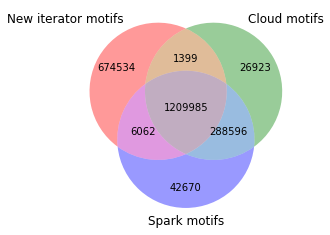

In [48]:
venn3_unweighted([set(df_new.motif), set(cloud_motifs), set(spark_motifs)], set_labels=["New iterator motifs", "Cloud motifs", "Spark motifs"])

## Compare new and cloud motifs

In [49]:
common_n_c = compare_common_motifs(df_new, df_cloud, "_n", "_c")
common_n_c

,group_n,motif,fc 0_n,fc 1_n,fc 2_n,fc 3_n,fc 4_n,fc 5_n,conf 0_n,conf 1_n,conf 2_n,conf 3_n,conf 4_n,conf 5_n,group_c,fc 0_c,fc 1_c,fc 2_c,fc 3_c,fc 4_c,fc 5_c,conf 0_c,conf 1_c,conf 2_c,conf 3_c,conf 4_c,conf 5_c
0,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,AAAAAAAC,4,3,2,2,2,1,0.000000,0.000000,0.000000,0.000000,0.250000,1.000000
1,AAAAAAAG,AAAAAAAG,9,9,9,2,1,0,0.444444,0.555556,0.611111,0.500000,0.500000,0.000000,AAAAAAAG,9,9,9,2,1,0,0.444444,0.555556,0.611111,0.500000,0.500000,0.000000
2,AAAAAAAT,AAAAAAAT,8,6,6,5,4,2,0.062500,0.000000,0.083333,0.400000,0.500000,0.500000,AAAAAAAT,8,6,6,5,4,2,0.062500,0.000000,0.083333,0.400000,0.500000,0.500000
3,AAAAAAAY,AAAAAAAY,10,9,7,6,6,5,0.050000,0.000000,0.000000,0.000000,0.333333,0.500000,AAAAAAAY,10,9,7,6,6,5,0.050000,0.000000,0.000000,0.000000,0.333333,0.500000
4,AAAAAACC,AAAAAACC,2,2,2,0,0,0,0.000000,0.250000,0.500000,0.000000,0.000000,0.000000,AAAAAACC,2,2,2,0,0,0,0.250000,0.500000,0.500000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211379,AAACNNTT,NNTTCAAA,10,10,10,8,6,5,0.100000,0.200000,0.300000,0.250000,0.500000,0.600000,AAACNNTT,10,10,10,8,6,5,0.100000,0.200000,0.300000,0.250000,0.500000,0.600000
1211380,AACGNNTT,NNTTCAGA,5,5,5,4,3,1,0.000000,0.000000,0.000000,0.250000,0.333333,1.000000,AACGNNTT,5,5,5,4,3,1,0.000000,0.000000,0.000000,0.250000,0.333333,1.000000
1211381,AAAGNNTT,NNTTGAAA,10,10,9,9,6,3,0.100000,0.200000,0.222222,0.444444,0.500000,0.666667,AAAGNNTT,10,10,9,9,6,3,0.100000,0.200000,0.222222,0.444444,0.500000,0.666667
1211382,AACGNNTT,NNTTGACA,9,8,7,5,5,2,0.222222,0.250000,0.285714,0.400000,0.600000,1.000000,AACGNNTT,9,8,8,5,5,2,0.222222,0.250000,0.375000,0.400000,0.600000,1.000000


In [50]:
comp_n_c = compare_fc(common_n_c.iloc[:,2:8], common_n_c.iloc[:,15:21])
count_difference(comp_n_c).describe()

,fc 2_c,fc 4_c
,other,other
count,138644.0,25398.0
mean,1.0,1.0
std,0.0,0.0
min,1.0,1.0
25%,1.0,1.0
50%,1.0,1.0
75%,1.0,1.0
max,1.0,1.0


<AxesSubplot:>

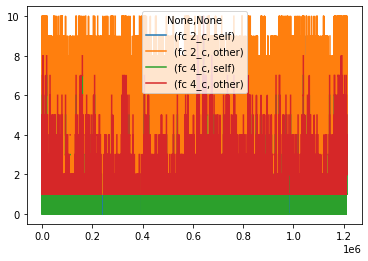

In [51]:
comp_n_c.plot()

In [52]:
mask = get_differences_mask(common_n_c.iloc[:, 8:14], common_n_c.iloc[:, 21:])
print(mask.mean())
common_n_c[mask]

0.6040157373714693


,group_n,motif,fc 0_n,fc 1_n,fc 2_n,fc 3_n,fc 4_n,fc 5_n,conf 0_n,conf 1_n,conf 2_n,conf 3_n,conf 4_n,conf 5_n,group_c,fc 0_c,fc 1_c,fc 2_c,fc 3_c,fc 4_c,fc 5_c,conf 0_c,conf 1_c,conf 2_c,conf 3_c,conf 4_c,conf 5_c
0,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1,0.000000,0.000000,0.000000,0.000000,0.50,1.000000,AAAAAAAC,4,3,2,2,2,1,0.000000,0.000000,0.000000,0.000000,0.25,1.000000
4,AAAAAACC,AAAAAACC,2,2,2,0,0,0,0.000000,0.250000,0.500000,0.000000,0.00,0.000000,AAAAAACC,2,2,2,0,0,0,0.250000,0.500000,0.500000,0.000000,0.00,0.000000
5,AAAAAACM,AAAAAACM,9,9,8,5,4,0,0.222222,0.222222,0.250000,0.400000,0.50,0.000000,AAAAAACM,9,9,9,5,4,0,0.222222,0.222222,0.222222,0.400000,0.50,0.000000
10,AAAAAACY,AAAAAACY,5,5,5,4,3,0,0.200000,0.200000,0.400000,0.750000,1.00,0.000000,AAAAAACY,5,5,5,4,3,0,0.200000,0.300000,0.400000,0.750000,1.00,0.000000
19,AAAAAAGS,AAAAAAGS,4,3,3,1,1,0,0.250000,0.000000,0.333333,0.000000,1.00,0.000000,AAAAAAGS,4,3,3,1,1,0,0.250000,0.000000,0.166667,0.000000,1.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211360,AACCGNNT,NNTGCACA,8,8,7,4,4,2,0.250000,0.375000,0.428571,0.500000,0.75,1.000000,AACCGNNT,8,8,8,4,4,2,0.250000,0.375000,0.500000,0.500000,0.75,1.000000
1211371,AAGGGNNT,NNTGGAAG,9,7,7,6,4,3,0.222222,0.142857,0.285714,0.500000,0.50,0.666667,AAGGGNNT,9,7,7,6,4,3,0.222222,0.142857,0.142857,0.500000,0.50,0.666667
1211374,AAGGGNNT,NNTGGAGA,10,10,9,9,5,4,0.300000,0.400000,0.444444,0.666667,0.60,0.750000,AAGGGNNT,10,10,10,9,5,4,0.300000,0.400000,0.400000,0.666667,0.60,0.750000
1211376,AACGNNTT,NNTGTCAA,9,8,7,5,5,2,0.222222,0.250000,0.285714,0.400000,0.60,1.000000,AACGNNTT,9,8,8,5,5,2,0.222222,0.250000,0.375000,0.400000,0.60,1.000000


## Compare new and spark motifs

In [53]:
common_n_s = compare_common_motifs(df_new, df_spark, "_n", "_s")
common_n_s

,group,motif,fc 0_n,fc 1_n,fc 2_n,fc 3_n,fc 4_n,fc 5_n,conf 0_n,conf 1_n,conf 2_n,conf 3_n,conf 4_n,conf 5_n,fc 0_s,fc 1_s,fc 2_s,fc 3_s,fc 4_s,fc 5_s,conf 0_s,conf 1_s,conf 2_s,conf 3_s,conf 4_s,conf 5_s
0,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,4,3,2,2,2,1,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000
1,AAAAAAAG,AAAAAAAG,9,9,9,2,1,0,0.444444,0.555556,0.611111,0.500000,0.500000,0.000000,9,9,9,2,1,0,0.555556,0.666667,0.666667,0.500000,0.000000,0.000000
2,AAAAAAAT,AAAAAAAT,8,6,6,5,4,2,0.062500,0.000000,0.083333,0.400000,0.500000,0.500000,8,6,6,5,4,2,0.000000,0.000000,0.000000,0.400000,0.500000,0.500000
3,AAAAAAAY,AAAAAAAY,10,9,7,6,6,5,0.050000,0.000000,0.000000,0.000000,0.333333,0.500000,10,9,7,6,6,5,0.100000,0.000000,0.000000,0.000000,0.333333,0.600000
4,AAAAAAAC,AAAAAACA,7,7,6,3,2,0,0.142857,0.285714,0.166667,0.333333,0.500000,0.000000,7,7,6,3,2,0,0.142857,0.285714,0.166667,0.333333,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216042,AAACNNTT,NNTTCAAA,10,10,10,8,6,5,0.100000,0.200000,0.300000,0.250000,0.500000,0.600000,10,10,10,8,6,5,0.100000,0.200000,0.300000,0.250000,0.500000,0.600000
1216043,AACGNNTT,NNTTCAGA,5,5,5,4,3,1,0.000000,0.000000,0.000000,0.250000,0.333333,1.000000,5,5,5,4,3,1,0.000000,0.000000,0.000000,0.250000,0.333333,1.000000
1216044,AAAGNNTT,NNTTGAAA,10,10,9,9,6,3,0.100000,0.200000,0.222222,0.444444,0.500000,0.666667,10,10,9,9,6,3,0.100000,0.200000,0.222222,0.444444,0.500000,0.666667
1216045,AACGNNTT,NNTTGACA,9,8,7,5,5,2,0.222222,0.250000,0.285714,0.400000,0.600000,1.000000,9,8,7,5,5,2,0.222222,0.250000,0.285714,0.400000,0.600000,1.000000


In [54]:
comp_n_s = compare_fc(common_n_s.iloc[:,2:8], common_n_s.iloc[:,14:20])
comp_n_s

Empty DataFrame
Columns: []
Index: []

In [55]:
mask = get_differences_mask(common_n_s.iloc[:,2:8],common_n_s.iloc[:,14:20])
mask.sum()

0

As can be expected, the family counts between motifIterator and the Spark implementation are the same, indicating no error in the Scala deserialization code.

In [56]:
mask = get_differences_mask(common_n_s.iloc[:,8:14],common_n_s.iloc[:,20:])
common_n_s[mask]

,group,motif,fc 0_n,fc 1_n,fc 2_n,fc 3_n,fc 4_n,fc 5_n,conf 0_n,conf 1_n,conf 2_n,conf 3_n,conf 4_n,conf 5_n,fc 0_s,fc 1_s,fc 2_s,fc 3_s,fc 4_s,fc 5_s,conf 0_s,conf 1_s,conf 2_s,conf 3_s,conf 4_s,conf 5_s
1,AAAAAAAG,AAAAAAAG,9,9,9,2,1,0,0.444444,0.555556,0.611111,0.500000,0.500000,0.000000,9,9,9,2,1,0,0.555556,0.666667,0.666667,0.500000,0.000000,0.000000
2,AAAAAAAT,AAAAAAAT,8,6,6,5,4,2,0.062500,0.000000,0.083333,0.400000,0.500000,0.500000,8,6,6,5,4,2,0.000000,0.000000,0.000000,0.400000,0.500000,0.500000
3,AAAAAAAY,AAAAAAAY,10,9,7,6,6,5,0.050000,0.000000,0.000000,0.000000,0.333333,0.500000,10,9,7,6,6,5,0.100000,0.000000,0.000000,0.000000,0.333333,0.600000
5,AAAAAACC,AAAAAACC,2,2,2,0,0,0,0.000000,0.250000,0.500000,0.000000,0.000000,0.000000,2,2,2,0,0,0,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000
6,AAAAAACM,AAAAAACM,9,9,8,5,4,0,0.222222,0.222222,0.250000,0.400000,0.500000,0.000000,9,9,8,5,4,0,0.222222,0.333333,0.250000,0.400000,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215978,AACCNNTT,NNTCATCA,8,8,8,8,3,1,0.125000,0.250000,0.250000,0.625000,0.333333,0.000000,8,8,8,8,3,1,0.125000,0.250000,0.250000,0.500000,0.333333,0.000000
1215983,AACCNNTT,NNTCCAAT,8,7,7,6,4,3,0.125000,0.142857,0.142857,0.500000,0.500000,0.666667,8,7,7,6,4,3,0.125000,0.142857,0.142857,0.333333,0.500000,0.666667
1215992,AACCNNTT,NNTCCTAA,8,7,7,4,3,2,0.125000,0.142857,0.142857,0.250000,0.333333,0.500000,8,7,7,4,3,2,0.125000,0.142857,0.142857,0.000000,0.333333,0.500000
1216007,AAACGNNT,NNTGACAA,10,8,8,6,4,3,0.300000,0.125000,0.250000,0.333333,0.500000,0.666667,10,8,8,6,4,3,0.300000,0.125000,0.250000,0.500000,0.500000,0.666667


In [57]:
comp_n_s = compare_fc(common_n_s.iloc[:,8:14],common_n_s.iloc[:,20:])
count_difference(comp_n_s).describe()

,conf 0_s,conf 1_s,conf 2_s,conf 3_s,conf 4_s,conf 5_s
,other,other,other,other,other,other
count,4.996450e+05,3.954150e+05,4.826750e+05,1.075900e+05,2.660000e+04,4.535000e+03
mean,2.303315e-01,2.446969e-01,4.255206e-01,3.163652e-01,1.423639e-01,-5.458679e-02
std,2.261831e-01,3.275244e-01,4.083511e-01,4.054972e-01,3.632926e-01,2.351432e-01
min,-1.666667e-01,-3.333333e-01,-3.333333e-01,-3.333333e-01,-1.000000e+00,-1.000000e+00
25%,3.333333e-08,1.428571e-08,3.333333e-08,3.333333e-08,6.666667e-09,3.333333e-08
50%,2.500000e-01,3.333333e-08,5.000000e-01,3.333333e-08,3.333333e-08,3.333333e-08
75%,5.000000e-01,5.000000e-01,1.000000e+00,5.000000e-01,3.333333e-08,3.333333e-08
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e-01


## Threeway compare

In [58]:
common_1 = compare_common_motifs(df_new, df_spark, "_n", "_s")
common_n_s_c = compare_common_motifs(common_1, df_cloud, "", "_c")
common_n_s_c

,group,motif,fc 0_n,fc 1_n,fc 2_n,fc 3_n,fc 4_n,fc 5_n,conf 0_n,conf 1_n,conf 2_n,conf 3_n,conf 4_n,conf 5_n,fc 0_s,fc 1_s,fc 2_s,fc 3_s,fc 4_s,fc 5_s,conf 0_s,conf 1_s,conf 2_s,conf 3_s,conf 4_s,conf 5_s,group_c,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5,conf 0,conf 1,conf 2,conf 3,conf 4,conf 5
0,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,4,3,2,2,2,1,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,AAAAAAAC,4,3,2,2,2,1,0.000000,0.000000,0.000000,0.000000,0.250000,1.000000
1,AAAAAAAG,AAAAAAAG,9,9,9,2,1,0,0.444444,0.555556,0.611111,0.500000,0.500000,0.000000,9,9,9,2,1,0,0.555556,0.666667,0.666667,0.500000,0.000000,0.000000,AAAAAAAG,9,9,9,2,1,0,0.444444,0.555556,0.611111,0.500000,0.500000,0.000000
2,AAAAAAAT,AAAAAAAT,8,6,6,5,4,2,0.062500,0.000000,0.083333,0.400000,0.500000,0.500000,8,6,6,5,4,2,0.000000,0.000000,0.000000,0.400000,0.500000,0.500000,AAAAAAAT,8,6,6,5,4,2,0.062500,0.000000,0.083333,0.400000,0.500000,0.500000
3,AAAAAAAY,AAAAAAAY,10,9,7,6,6,5,0.050000,0.000000,0.000000,0.000000,0.333333,0.500000,10,9,7,6,6,5,0.100000,0.000000,0.000000,0.000000,0.333333,0.600000,AAAAAAAY,10,9,7,6,6,5,0.050000,0.000000,0.000000,0.000000,0.333333,0.500000
4,AAAAAACC,AAAAAACC,2,2,2,0,0,0,0.000000,0.250000,0.500000,0.000000,0.000000,0.000000,2,2,2,0,0,0,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,AAAAAACC,2,2,2,0,0,0,0.250000,0.500000,0.500000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209980,AAACNNTT,NNTTCAAA,10,10,10,8,6,5,0.100000,0.200000,0.300000,0.250000,0.500000,0.600000,10,10,10,8,6,5,0.100000,0.200000,0.300000,0.250000,0.500000,0.600000,AAACNNTT,10,10,10,8,6,5,0.100000,0.200000,0.300000,0.250000,0.500000,0.600000
1209981,AACGNNTT,NNTTCAGA,5,5,5,4,3,1,0.000000,0.000000,0.000000,0.250000,0.333333,1.000000,5,5,5,4,3,1,0.000000,0.000000,0.000000,0.250000,0.333333,1.000000,AACGNNTT,5,5,5,4,3,1,0.000000,0.000000,0.000000,0.250000,0.333333,1.000000
1209982,AAAGNNTT,NNTTGAAA,10,10,9,9,6,3,0.100000,0.200000,0.222222,0.444444,0.500000,0.666667,10,10,9,9,6,3,0.100000,0.200000,0.222222,0.444444,0.500000,0.666667,AAAGNNTT,10,10,9,9,6,3,0.100000,0.200000,0.222222,0.444444,0.500000,0.666667
1209983,AACGNNTT,NNTTGACA,9,8,7,5,5,2,0.222222,0.250000,0.285714,0.400000,0.600000,1.000000,9,8,7,5,5,2,0.222222,0.250000,0.285714,0.400000,0.600000,1.000000,AACGNNTT,9,8,8,5,5,2,0.222222,0.250000,0.375000,0.400000,0.600000,1.000000
